In [4]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import lsst.sims.skybrightness_pre as sb
import healpy as hp
import lsst.sims.skybrightness as sb1
from lsst.sims.utils import photo_m5

In [2]:
sm = sb.SkyModelPre(preload=False)
mjd = 60364.0208333333#59760. #60364.0208333333
mags = sm.returnMags(mjd)

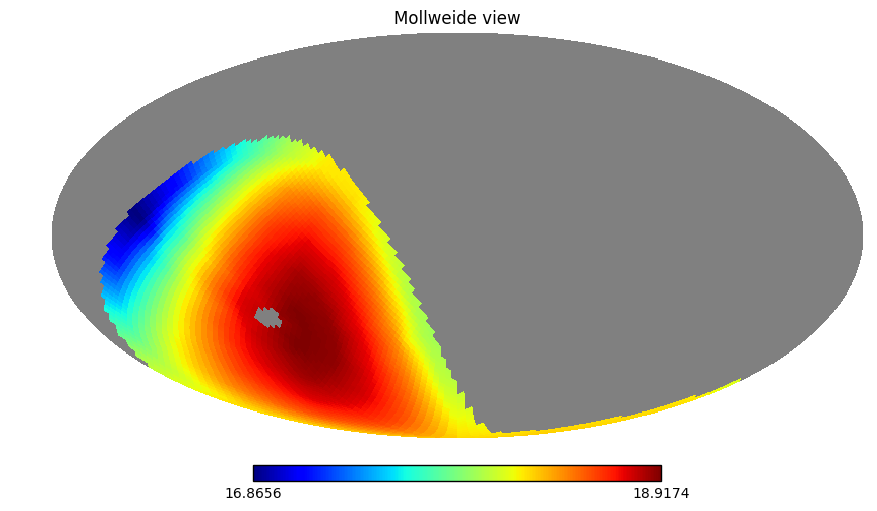

In [5]:
hp.mollview(mags['r'])

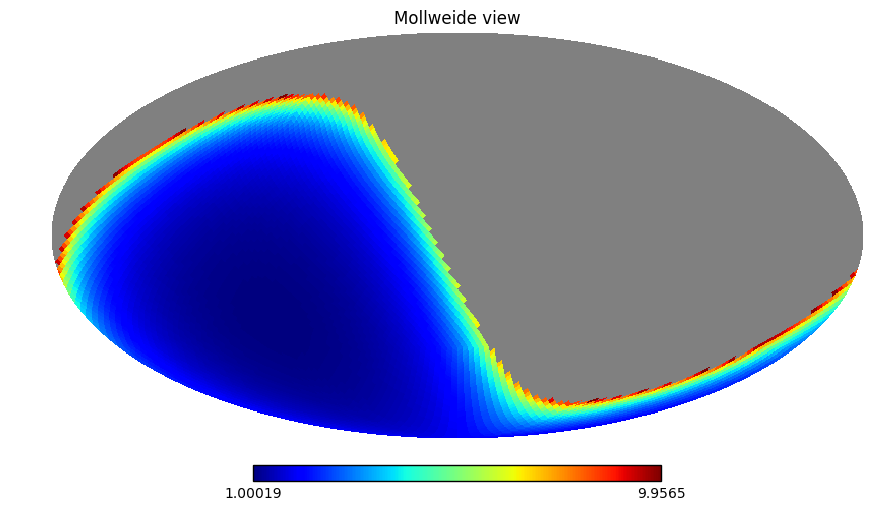

In [8]:
am = sm.returnAirmass(mjd)
hp.mollview(am)

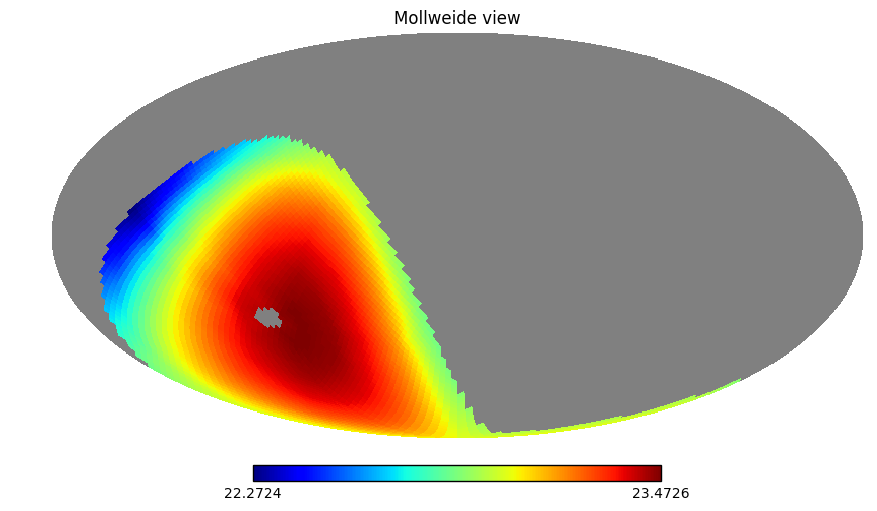

In [12]:
good = np.where(mags['r'] != hp.UNSEEN)
m5 = mags['r']*0 + hp.UNSEEN
m5[good] = photo_m5('r', mags['r'][good], 0.7, 30., am[good])

hp.mollview(m5)

In [14]:
m52per = sb.M5percentiles()
percentiles = m52per.m5map2percentile(m5, filtername='r')

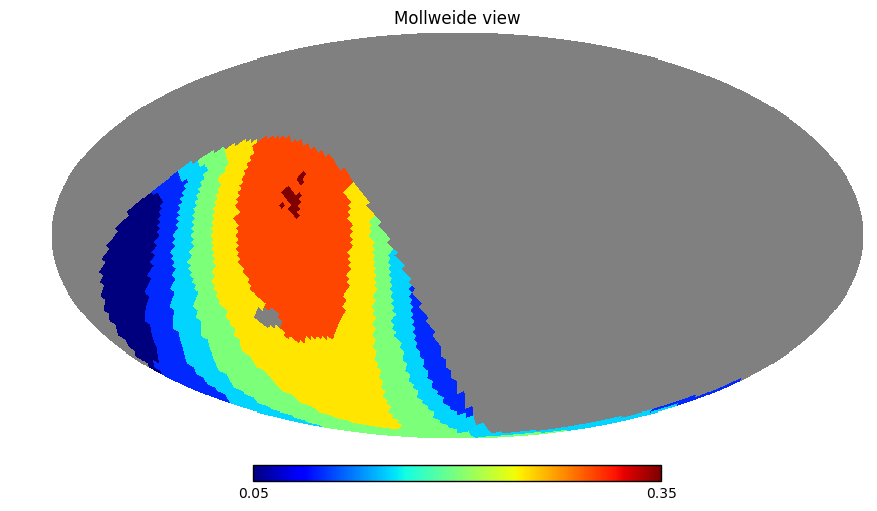

In [15]:
hp.mollview(percentiles)